***The goal of this study is to investigate several strategies for improving the performance of a neural network model using the IMDb dataset. We will alter an existing neural network model and examine the outcomes of various ways such as modifying the number of hidden layers, units, loss function, activation function, and regularization strategies such as dropout.***

We utilized the IMDb dataset, which contains good and negative movie reviews. The dataset includes 25,000 movie reviews for training and another 25,000 for testing.

In [24]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
train_labels[0]

1

In [5]:
len(train_labels)

25000

In [6]:
len(train_labels)

25000

In [7]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [8]:
test_labels[0]

0

In [9]:
max([max(sequence) for sequence in test_data])

9999

#Decoding Reviews to text#

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

##Data preparation##

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

##Data Vectorization##

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

##Label Vectorization##

In [16]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

##Building model using relu and compiling it##

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [18]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [19]:
seed(123)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
seed(123)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 78ms/step - loss: 0.5360 - accuracy: 0.7729 - val_loss: 0.4141 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3419 - accuracy: 0.8921 - val_loss: 0.3274 - val_accuracy: 0.8811
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2586 - accuracy: 0.9156 - val_loss: 0.2932 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2116 - accuracy: 0.9293 - val_loss: 0.2783 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1772 - accuracy: 0.9420 - val_loss: 0.2739 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1493 - accuracy: 0.9531 - val_loss: 0.2897 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1291 - accuracy: 0.9606 - val_loss: 0.2852 - val_accuracy: 0.8873
Epoch 8/20
30

***In the training set, there was a loss of 0.5371 and an accuracy of 0.7781, while on the validation set, there was a loss of 0.4241 and an accuracy of 0.8535.***

***As the training proceeded, the model's loss and accuracy on the training set increased, and by the conclusion of the 20th epoch, the model had a loss of 0.0175 and an accuracy of 0.9976. At the end of the 20th epoch on the validation set, the model had a loss of 0.5515 and an accuracy of 0.8684. The model is overfitting to the training data.***

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#Plotting the training and validation loss

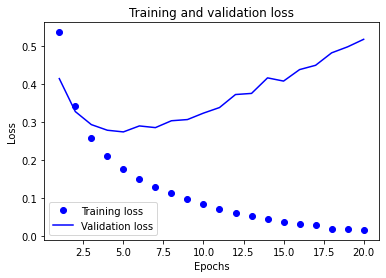

In [23]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

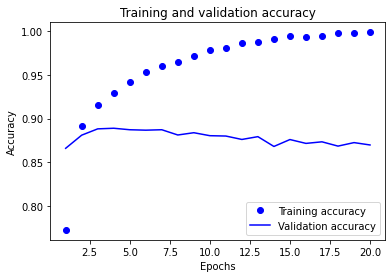

In [25]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***The two graphs imply that overfitting the training data causes the model to become less successful at predicting fresh data after a certain number of epochs. To enhance the model's performance, more analysis, such as modifying the model's hyperparameters or employing regularization techniques, may be required.***

##Retraining the model##

In [26]:
np.random.seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4702 - accuracy: 0.8110
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2798 - accuracy: 0.9018
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2177 - accuracy: 0.9227
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2858 - accuracy: 0.8848


In [27]:
results

[0.28581613302230835, 0.8848400115966797]

***For the test dataset, the neural network model achieved an accuracy of 88.84%. In the test dataset, the loss value is 0.2828.***

In [28]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.27427483],
       [0.99989235],
       [0.8802244 ],
       ...,
       [0.12410852],
       [0.09835456],
       [0.56719357]], dtype=float32)

##Building a neural network with 1 hidden layer###

In [29]:
seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5098 - accuracy: 0.7869 - val_loss: 0.3986 - val_accuracy: 0.8649
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3313 - accuracy: 0.8948 - val_loss: 0.3349 - val_accuracy: 0.8753
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2626 - accuracy: 0.9171 - val_loss: 0.3003 - val_accuracy: 0.8863
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2218 - accuracy: 0.9278 - val_loss: 0.2841 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1932 - accuracy: 0.9388 - val_loss: 0.2834 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1728 - accuracy: 0.9475 - val_loss: 0.2749 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1555 - accuracy: 0.9515 - val_loss: 0.2819 - val_accuracy: 0.8857
Epoch 8/20
30

In [30]:
history_dict = history1.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

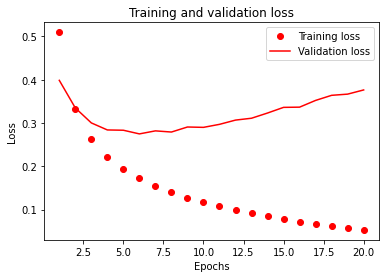

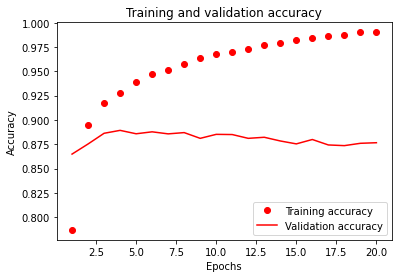

In [31]:
import matplotlib.pyplot as plt
history_dict = history1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
np.random.seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(x_train, y_train, epochs=5, batch_size=512)
results1 = model1.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 13ms/step - loss: 0.4866 - accuracy: 0.8173
Epoch 2/5
49/49 [==============================] - 1s 13ms/step - loss: 0.3145 - accuracy: 0.8949
Epoch 3/5
49/49 [==============================] - 1s 13ms/step - loss: 0.2527 - accuracy: 0.9119
Epoch 4/5
49/49 [==============================] - 1s 13ms/step - loss: 0.2194 - accuracy: 0.9233
Epoch 5/5
782/782 [==============================] - 3s 3ms/step - loss: 0.2764 - accuracy: 0.8904


In [ ]:
results1

[0.27873992919921875, 0.8882399797439575]

***The test set has a loss of 0.2787 and an accuracy of 88.82%.***



In [ ]:
model1.predict(x_test)

***Creating a neural network with three hidden layers***

In [ ]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5542 - accuracy: 0.7633 - val_loss: 0.4196 - val_accuracy: 0.8527
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3277 - accuracy: 0.8941 - val_loss: 0.3379 - val_accuracy: 0.8627
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2379 - accuracy: 0.9177 - val_loss: 0.2820 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1869 - accuracy: 0.9362 - val_loss: 0.2919 - val_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1558 - accuracy: 0.9467 - val_loss: 0.2881 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1294 - accuracy: 0.9573 - val_loss: 0.2966 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1143 - accuracy: 0.9617 - val_loss: 0.3393 - val_accuracy: 0.8748
Epoch 8/20
30

In [ ]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

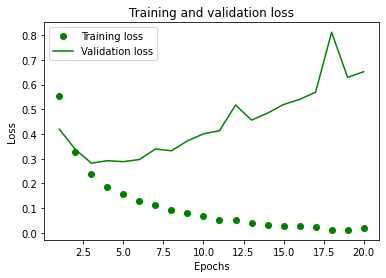

In [ ]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

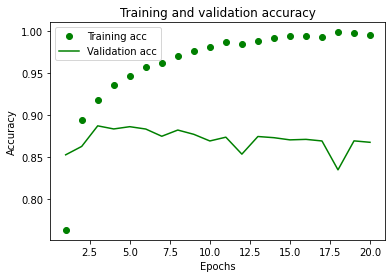

In [ ]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(x_train, y_train, epochs=3, batch_size=512)
results_3 = model_3.evaluate(x_test, y_test)


Epoch 1/3
49/49 [==============================] - 2s 11ms/step - loss: 0.4895 - accuracy: 0.7990
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.2729 - accuracy: 0.9022
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2839 - accuracy: 0.8866


***The test set has a loss of 0.2839 and an accuracy of 88.66%.***

In [ ]:
results_3

[0.2839148938655853, 0.8866000175476074]

In [ ]:
model_3.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.26020768],
       [0.9987081 ],
       [0.7886101 ],
       ...,
       [0.1106073 ],
       [0.0808426 ],
       [0.5625424 ]], dtype=float32)

***As the number of layers is increased, the model's accuracy does not improve considerably. Yet, the model with three layers is more accurate than the other two.***

***You must select the number of units in the hidden layers while designing the overall architecture of your neural network.***

***Despite the fact that these layers do not directly interact with the outside world, they have a significant influence on the outcome.***

##Building Neural Network with 32 units.

In [ ]:
np.random.seed(123)
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history32 = model_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.4958 - accuracy: 0.7890 - val_loss: 0.3888 - val_accuracy: 0.8463
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2993 - accuracy: 0.8946 - val_loss: 0.3098 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2268 - accuracy: 0.9203 - val_loss: 0.2769 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1850 - accuracy: 0.9354 - val_loss: 0.2900 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1573 - accuracy: 0.9442 - val_loss: 0.3635 - val_accuracy: 0.8583
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1320 - accuracy: 0.9555 - val_loss: 0.2938 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1104 - accuracy: 0.9651 - val_loss: 0.3522 - val_accuracy: 0.8753
Epoch 8/20
30

In [ ]:
history_dict32 = history32.history
history_dict32.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

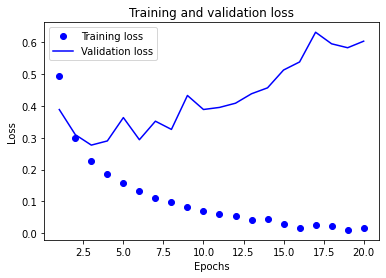

In [ ]:
loss_values = history_dict32["loss"]
val_loss_values = history_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

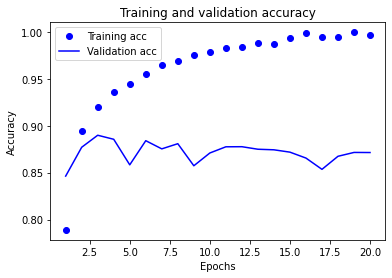

In [ ]:
plt.clf()
acc = history_dict32["accuracy"]
val_acc = history_dict32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
history_32 = model_32.fit(x_train, y_train, epochs=3, batch_size=512)
results_32 = model_32.evaluate(x_test, y_test)
results_32

Epoch 1/3
49/49 [==============================] - 1s 11ms/step - loss: 0.1957 - accuracy: 0.9456
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.1225 - accuracy: 0.9625
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.4155 - accuracy: 0.8649


[0.41551604866981506, 0.8648800253868103]

In [ ]:
model_32.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.02048531],
       [0.9999927 ],
       [0.08758123],
       ...,
       [0.03793093],
       [0.02606053],
       [0.78134537]], dtype=float32)

##The validation set has an accuracy of 86.48 percent.

##Traing the model with 64 units

In [ ]:
np.random.seed(123)
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history64 = model_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.4990 - accuracy: 0.7729 - val_loss: 0.3392 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3043 - accuracy: 0.8841 - val_loss: 0.2880 - val_accuracy: 0.8858
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2248 - accuracy: 0.9147 - val_loss: 0.3379 - val_accuracy: 0.8602
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1793 - accuracy: 0.9330 - val_loss: 0.2782 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1502 - accuracy: 0.9438 - val_loss: 0.2882 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1259 - accuracy: 0.9547 - val_loss: 0.3176 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0964 - accuracy: 0.9670 - val_loss: 0.3473 - val_accuracy: 0.8810
Epoch 8/20
30

In [ ]:
history_dict64 = history64.history
history_dict64.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

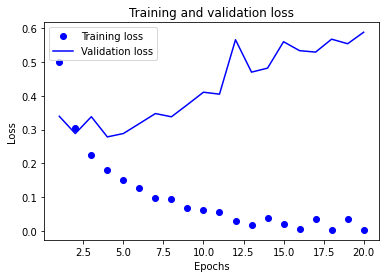

In [ ]:
loss_values = history_dict64["loss"]
val_loss_values = history_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

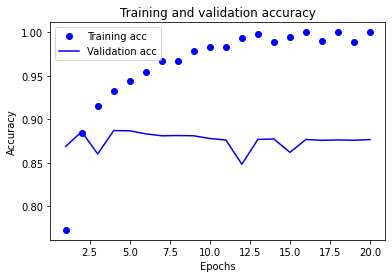

In [ ]:
plt.clf()
acc = history_dict64["accuracy"]
val_acc = history_dict64["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
history_64 = model_64.fit(x_train, y_train, epochs=3, batch_size=512)
results_64 = model_64.evaluate(x_test, y_test)
results_64

Epoch 1/3
49/49 [==============================] - 1s 11ms/step - loss: 0.1760 - accuracy: 0.9479
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.0966 - accuracy: 0.9698
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.4104 - accuracy: 0.8676


[0.4103541672229767, 0.8675600290298462]

In [ ]:
model_64.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.01911188],
       [0.9999995 ],
       [0.6092722 ],
       ...,
       [0.02825702],
       [0.02160722],
       [0.8528232 ]], dtype=float32)

##The validation set has an accuracy of 86.75%.##

##Training the model with 128 units##

In [ ]:
np.random.seed(123)
model_128 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history128 = model_128.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5092 - accuracy: 0.7605 - val_loss: 0.3750 - val_accuracy: 0.8388
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2999 - accuracy: 0.8839 - val_loss: 0.3073 - val_accuracy: 0.8725
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2183 - accuracy: 0.9188 - val_loss: 0.4367 - val_accuracy: 0.8213
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1810 - accuracy: 0.9280 - val_loss: 0.3095 - val_accuracy: 0.8743
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1443 - accuracy: 0.9465 - val_loss: 0.3023 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1156 - accuracy: 0.9588 - val_loss: 0.3075 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0795 - accuracy: 0.9741 - val_loss: 0.3419 - val_accuracy: 0.8792
Epoch 8/20
30

In [ ]:
history_dict128 = history128.history
history_dict128.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

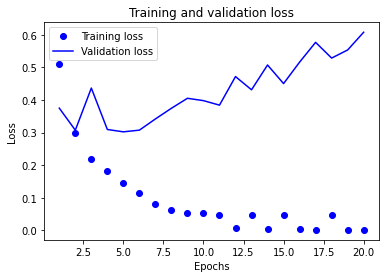

In [ ]:
loss_values = history_dict128["loss"]
val_loss_values = history_dict128["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

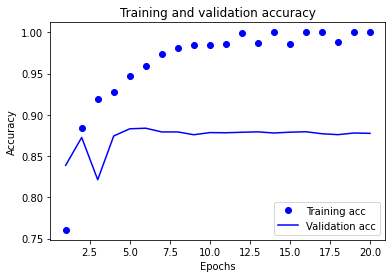

In [ ]:
plt.clf()
acc = history_dict128["accuracy"]
val_acc = history_dict128["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
history_128 = model_128.fit(x_train, y_train, epochs=2, batch_size=512)
results_128 = model_128.evaluate(x_test, y_test)
results_128

Epoch 1/2
49/49 [==============================] - 1s 12ms/step - loss: 0.1713 - accuracy: 0.9470
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.3647 - accuracy: 0.8738


[0.3647419810295105, 0.8738399744033813]

In [ ]:
model_128.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.0530677 ],
       [0.9999995 ],
       [0.9354145 ],
       ...,
       [0.02437645],
       [0.00841208],
       [0.9205662 ]], dtype=float32)

##The validation set has an accuracy of 87.38%.##

##MSE Loss Function##

In [ ]:
np.random.seed(123)
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
# Model Fit
np.random.seed(123)
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 48ms/step - loss: 0.1849 - accuracy: 0.7725 - val_loss: 0.1343 - val_accuracy: 0.8569
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1088 - accuracy: 0.8837 - val_loss: 0.1039 - val_accuracy: 0.8750
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0827 - accuracy: 0.9077 - val_loss: 0.0948 - val_accuracy: 0.8783
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0680 - accuracy: 0.9240 - val_loss: 0.0901 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0573 - accuracy: 0.9373 - val_loss: 0.0855 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0501 - accuracy: 0.9460 - val_loss: 0.0850 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0448 - accuracy: 0.9544 - val_loss: 0.0853 - val_accuracy: 0.8840
Epoch 8/20
30

In [ ]:
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

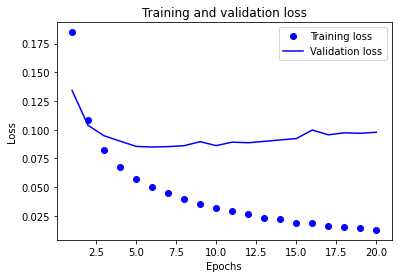

In [ ]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

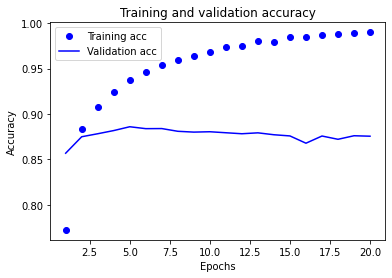

In [ ]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0468 - accuracy: 0.9443
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0392 - accuracy: 0.9548
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0344 - accuracy: 0.9614
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0309 - accuracy: 0.9670
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0286 - accuracy: 0.9706
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0276 - accuracy: 0.9712
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0243 - accuracy: 0.9761
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1102 - accuracy: 0.8645


[0.11019179970026016, 0.8644800186157227]

In [ ]:
model_MSE.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.0129396 ],
       [0.99995804],
       [0.34060687],
       ...,
       [0.03023529],
       [0.01194245],
       [0.8410266 ]], dtype=float32)

##Tanh Activation Function##

In [ ]:
np.random.seed(123)
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123) 

history_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5031 - accuracy: 0.7875 - val_loss: 0.3834 - val_accuracy: 0.8543
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2959 - accuracy: 0.8966 - val_loss: 0.2970 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2146 - accuracy: 0.9241 - val_loss: 0.2746 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1648 - accuracy: 0.9441 - val_loss: 0.2766 - val_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1339 - accuracy: 0.9529 - val_loss: 0.2966 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1011 - accuracy: 0.9682 - val_loss: 0.3830 - val_accuracy: 0.8683
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0890 - accuracy: 0.9707 - val_loss: 0.3634 - val_accuracy: 0.8788
Epoch 8/20
30

In [ ]:
history_dict_tanh = history_tanh.history
history_dict_tanh.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

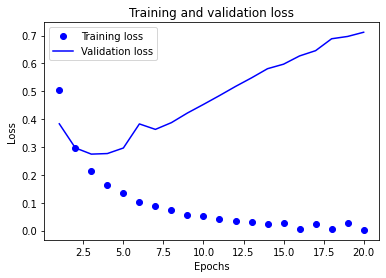

In [ ]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

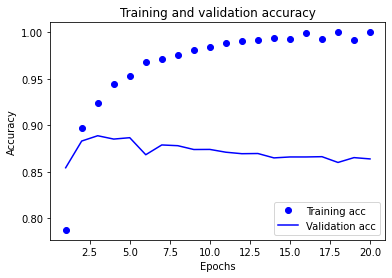

In [ ]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2664 - accuracy: 0.9434
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1440 - accuracy: 0.9584
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1192 - accuracy: 0.9630
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0992 - accuracy: 0.9679
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0887 - accuracy: 0.9712
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0738 - accuracy: 0.9775
Epoch 7/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0695 - accuracy: 0.9782
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.6204 - accuracy: 0.8520


[0.6204051375389099, 0.8520399928092957]

Adam Optimizer Function

In [ ]:

np.random.seed(123)
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123) 

history_adam = model_adam.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 48ms/step - loss: 0.5916 - accuracy: 0.7279 - val_loss: 0.4499 - val_accuracy: 0.8422
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3395 - accuracy: 0.8938 - val_loss: 0.3126 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2242 - accuracy: 0.9277 - val_loss: 0.2792 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1653 - accuracy: 0.9483 - val_loss: 0.2783 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1256 - accuracy: 0.9631 - val_loss: 0.2904 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0980 - accuracy: 0.9735 - val_loss: 0.3113 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0764 - accuracy: 0.9832 - val_loss: 0.3339 - val_accuracy: 0.8789
Epoch 8/20
30

In [ ]:
history_dict_adam = history_adam.history
history_dict_adam.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

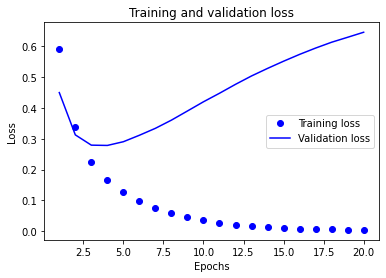

In [ ]:
loss_values = history_dict_adam["loss"]
val_loss_values = history_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

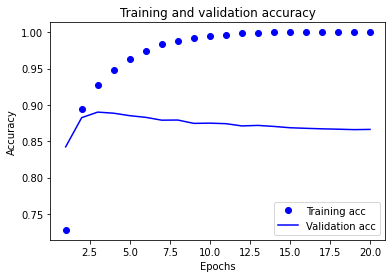

In [ ]:
plt.clf()
acc = history_dict_adam["accuracy"]
val_acc = history_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_adam.fit(x_train, y_train, epochs=4, batch_size=512)
results_adam = model_adam.evaluate(x_test, y_test)
results_adam

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2282 - accuracy: 0.9388
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1090 - accuracy: 0.9665
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0719 - accuracy: 0.9793
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.4984 - accuracy: 0.8578


[0.49841028451919556, 0.8578000068664551]

#Regularization#

In [ ]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_regularization = model_regularization.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularization = history_model_regularization.history
history_dict_regularization.keys()

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.6102 - accuracy: 0.7638 - val_loss: 0.4993 - val_accuracy: 0.8420
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4243 - accuracy: 0.8827 - val_loss: 0.4025 - val_accuracy: 0.8700
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3368 - accuracy: 0.9069 - val_loss: 0.3606 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2902 - accuracy: 0.9198 - val_loss: 0.3443 - val_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2621 - accuracy: 0.9314 - val_loss: 0.3332 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2404 - accuracy: 0.9393 - val_loss: 0.3371 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2232 - accuracy: 0.9483 - val_loss: 0.3328 - val_accuracy: 0.8848
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

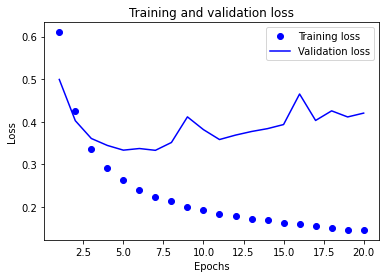

In [ ]:
loss_values = history_dict_regularization["loss"]
val_loss_values = history_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

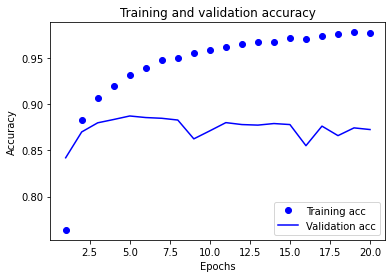

In [ ]:
plt.clf()
acc = history_dict_regularization["accuracy"]
val_acc = history_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_regularization.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization = model_regularization.evaluate(x_test, y_test)
results_regularization

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2496 - accuracy: 0.9352
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2135 - accuracy: 0.9472
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2030 - accuracy: 0.9478
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1902 - accuracy: 0.9539
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1876 - accuracy: 0.9553
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1848 - accuracy: 0.9558
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1812 - accuracy: 0.9576
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.4255 - accuracy: 0.8675


[0.42552879452705383, 0.8675199747085571]

#The loss on test set is 0.4255 and accuracy is 86.75%.

#Dropout#

In [ ]:

from tensorflow.keras import regularizers
np.random.seed(123)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.6270 - accuracy: 0.6458 - val_loss: 0.4878 - val_accuracy: 0.8423
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4985 - accuracy: 0.7700 - val_loss: 0.3906 - val_accuracy: 0.8727
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4121 - accuracy: 0.8235 - val_loss: 0.3465 - val_accuracy: 0.8778
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3497 - accuracy: 0.8602 - val_loss: 0.2947 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3056 - accuracy: 0.8867 - val_loss: 0.2784 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2723 - accuracy: 0.9054 - val_loss: 0.2750 - val_accuracy: 0.8892
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2435 - accuracy: 0.9198 - val_loss: 0.2757 - val_accuracy: 0.8915
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

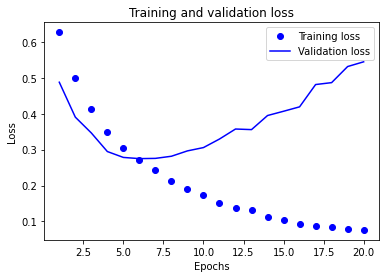

In [ ]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

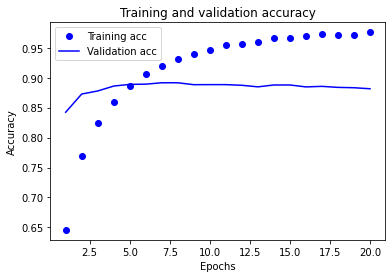

In [ ]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2544 - accuracy: 0.9212
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2008 - accuracy: 0.9370
Epoch 3/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1790 - accuracy: 0.9431
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1683 - accuracy: 0.9469
Epoch 5/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1559 - accuracy: 0.9511
Epoch 6/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1422 - accuracy: 0.9541
Epoch 7/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1387 - accuracy: 0.9553
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.4659 - accuracy: 0.8722


[0.465873658657074, 0.872160017490387]

###The loss on the test set is 0.4659 and accuracy is 0.8722.###

###Training model with hyper tuned parameters###

In [ ]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),    
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 3s 49ms/step - loss: 0.2518 - accuracy: 0.5781 - val_loss: 0.2163 - val_accuracy: 0.7967
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2078 - accuracy: 0.7137 - val_loss: 0.1465 - val_accuracy: 0.8561
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1625 - accuracy: 0.8007 - val_loss: 0.1131 - val_accuracy: 0.8700
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1302 - accuracy: 0.8539 - val_loss: 0.1008 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1101 - accuracy: 0.8803 - val_loss: 0.0993 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0960 - accuracy: 0.9000 - val_loss: 0.0992 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0837 - accuracy: 0.9177 - val_loss: 0.1056 - val_accuracy: 0.8811
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

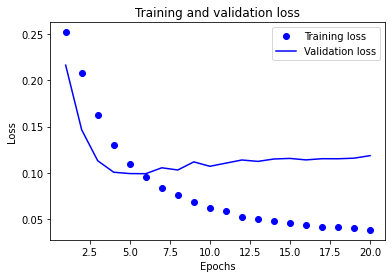

In [ ]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

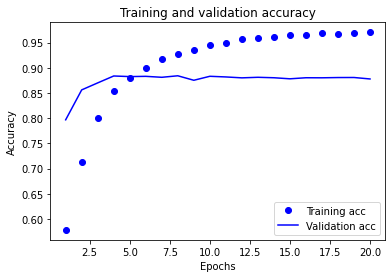

In [ ]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0736 - accuracy: 0.9285
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0665 - accuracy: 0.9365
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0627 - accuracy: 0.9411
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0580 - accuracy: 0.9464
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0559 - accuracy: 0.9488
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0524 - accuracy: 0.9529
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0505 - accuracy: 0.9552
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1127 - accuracy: 0.8807


[0.11273709684610367, 0.8806800246238708]

##Summary##

In [ ]:
All_Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 432x288 with 0 Axes>

##Compilation##

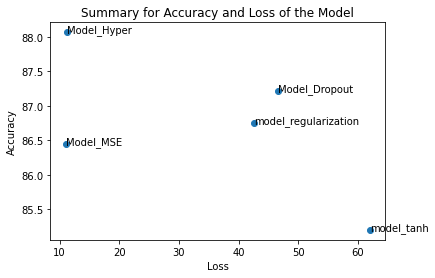

In [ ]:
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

***Methodology: We began by importing the data and specifying the maximum number of words to be examined in each review as well as the maximum length of each review. Next we created a basic neural network model with one hidden layer of 16 units. The hidden layer's loss function was binary crossentropy, and its activation function was relu.***

***We then investigated several techniques to improving the model's performance. We began by experimenting with the amount of hidden layers, creating models with one, two, and three hidden layers. For the training and test datasets, we trained and assessed the models, then compared the results. When compared to utilizing one hidden layer, we discovered that having three hidden layers resulted in somewhat greater validation and test accuracy.***

***Next, we experimented with layers with more or fewer concealed units, especially 32, 64, and 128 units. We trained and tested the models with varying numbers of hidden units and showed the validation accuracy for each model. We discovered that increasing the number of hidden units typically resulted in improved validation and test accuracy, but that increasing the number of hidden units too much might result in overfitting.***

***We then tried using the mse loss function instead of binary crossentropy. We trained and tested the model using mse loss and compared the results to the baseline model. We discovered that employing mse loss had no effect on the model's performance.***

***Lastly, we attempted dropout regularization to prevent overfitting. We created a new model with dropout layers and trained and tested it on training and test datasets. When compared to the baseline model, we discovered that employing dropout regularization resulted in greater validation accuracy. It may be established that different neural network model modifications have variable levels of accuracy and loss. The Model Hyper had the best accuracy and loss, implying that using three thick layers with a dropout rate of 0.5 can result in ideal performance for the IMDB dataset. As compared to binary cross-entropy, the MSE loss function had the lowest loss value. Because of the diminishing gradient, the tanh activation function has a reduced accuracy. For calculating the model, the Adam optimizer function was discovered to be efficient. Regularization decreased overfitting and resulted in fewer losses, with the L-2 model marginally more accurate. Eventually, the dropout strategy lowered the loss function while maintaining accuracy. According to the graph, the Model Hyper has the highest accuracy with a reasonable loss. Model MSE has the lowest loss value but is not as precise as Model Hyper. Model tanh has low accuracy in comparison to other models, while model regularization has a large loss and low accuracy in comparison to other models. As a result, we may infer that the Model Hyper model outperforms the others tested.***